In [1]:
conda install scikit-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.2



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install scikit-learn

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np

In [5]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

In [ ]:
X=np.array(X)
y=np.array(y)

In [169]:
#Splits off 25% of the set into a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
print(np.shape(X),np.shape(X_train),np.shape(X_test))

print(np.shape(y),np.shape(y_train),np.shape(y_test))

(6497, 1) (4872, 1) (1625, 1)


In [241]:
#Finds global minimum of error function using closed form solution
def optimizeCF(x_train,yy_train):
    x_aug=np.hstack((x_train,np.full((x_train.shape[0], 1), 1)))
    Q=np.dot(x_aug.T,x_aug)
    bt=np.dot(x_aug.T,yy_train)
    w_aug=np.dot(np.linalg.inv(Q),bt)
    return w_aug

def predict(x_train, w_aug):
    x_aug=np.hstack((x_train,np.full((x_train.shape[0], 1), 1)))
    ypred=np.dot(x_aug,w_aug)
    return ypred

def rms(w_aug,x_train,yy_train):
    x_aug=np.hstack((x_train,np.full((x_train.shape[0], 1), 1)))
    N=np.shape(x_train)[0]
    yp=np.dot(x_aug,w_aug)
    rms=(np.sqrt(np.dot((yp-yy_train).T,yp-yy_train)[0,0])/N)
    return rms

In [229]:
w_CF=optimizeCF(X_train,y_train)

In [230]:
print(f"w={w_CF[0:11]}, b={w_CF[11]}")

w=[[ 7.79799606e-02]
 [-1.35468144e+00]
 [-1.24520622e-01]
 [ 4.49666355e-02]
 [-4.16994236e-01]
 [ 6.02885701e-03]
 [-2.45700378e-03]
 [-6.02432776e+01]
 [ 4.76976198e-01]
 [ 7.55473891e-01]
 [ 2.66962788e-01]], b=[60.82140173]


In [51]:
import matplotlib.pyplot as plt

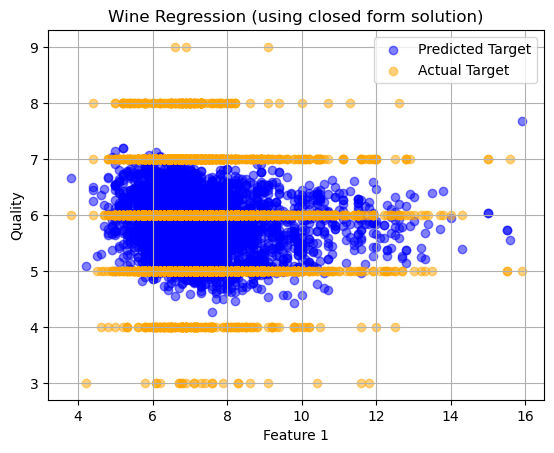

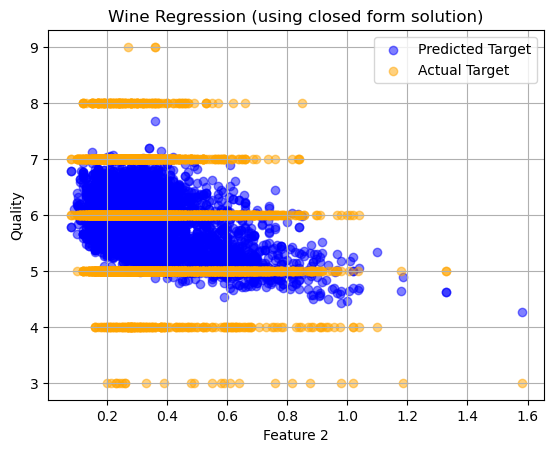

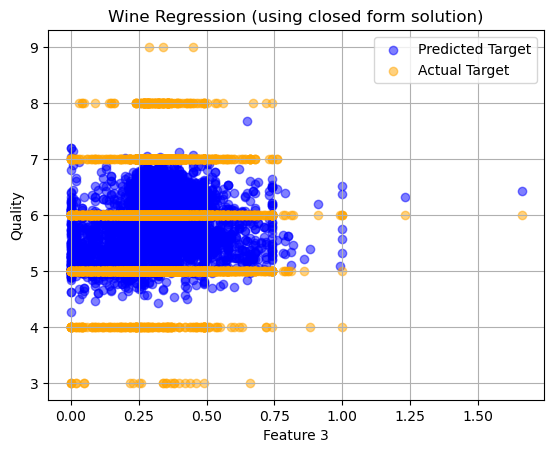

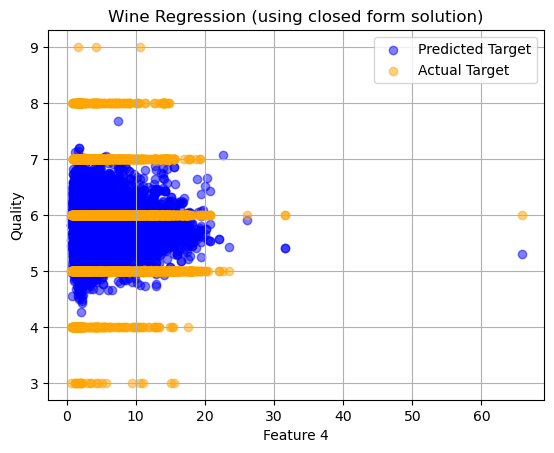

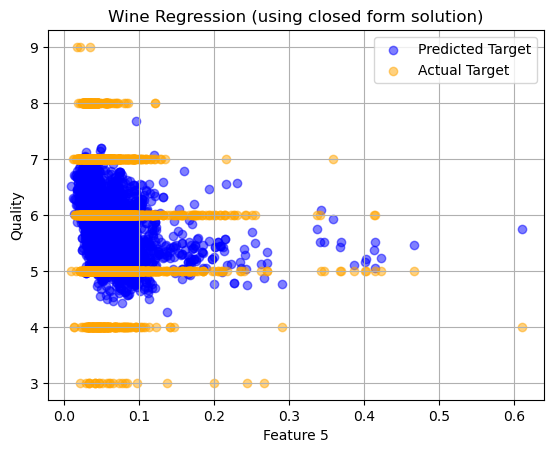

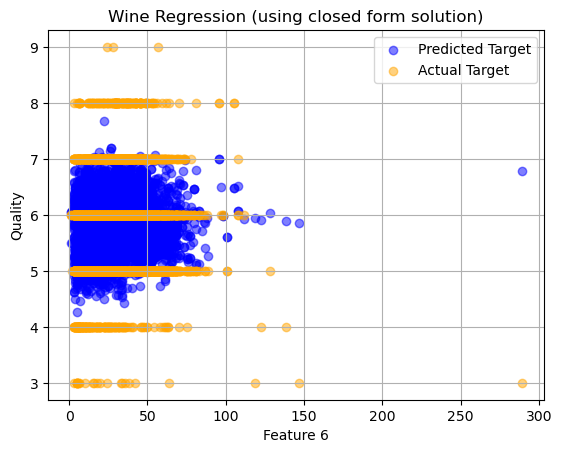

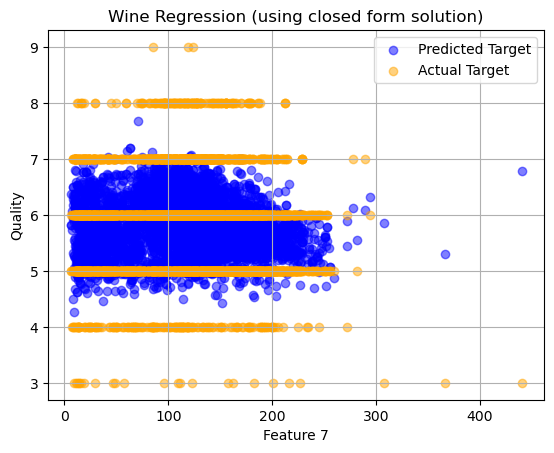

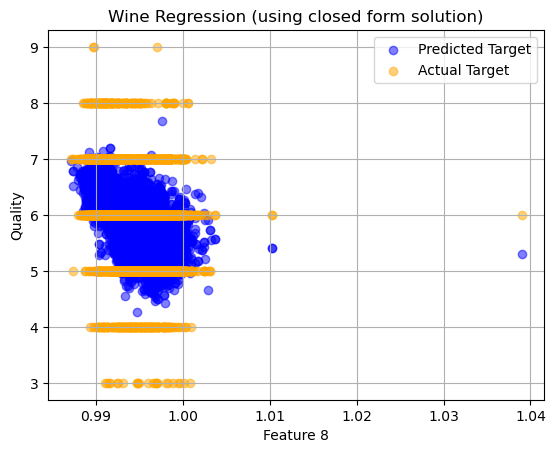

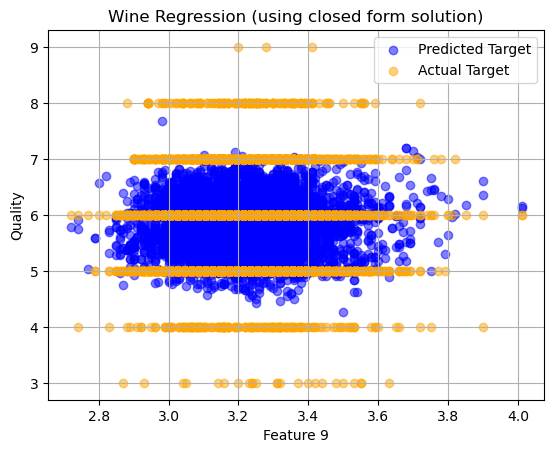

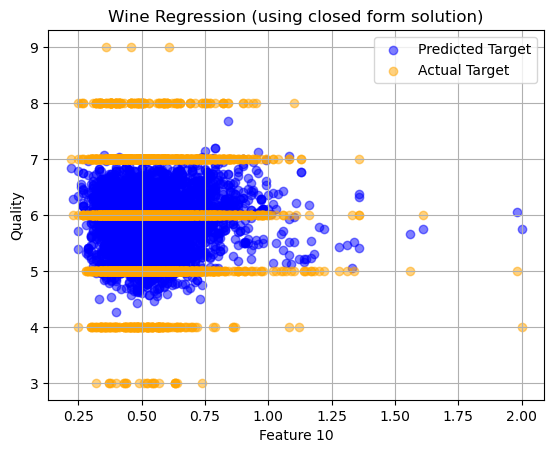

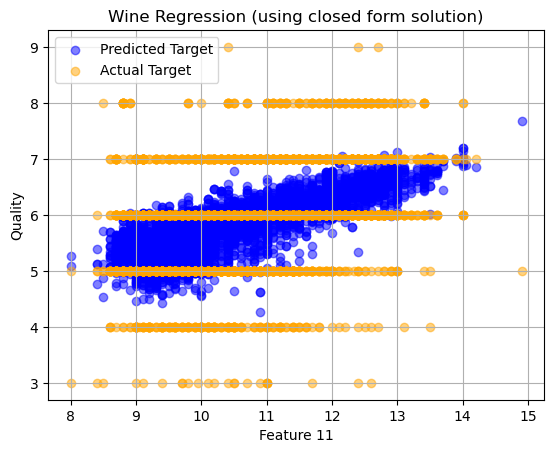

In [209]:
y_train_pred=predict(X_train,w_CF)
y_test_pred=predict(X_test,w_CF)
for i in range(np.shape(X_train)[1]):
    plt.scatter(X_train[:,i], y_train_pred, color='blue', label='Predicted Target', alpha=0.5)
    plt.scatter(X_train[:,i], y_train, color='orange', label='Actual Target', alpha=0.5)
    plt.title('Wine Regression (using closed form solution)')
    plt.xlabel(f"Feature {i+1}")
    plt.ylabel('Quality')
    plt.legend()
    plt.grid()
    plt.show()

In [244]:
rms_train=rms(w_CF,X_train,y_train)
print(f"RMS error for training set: {rms_train}")

rms_test=rms(w_CF,X_test,y_test)
print(f"RMS error for test set: {rms_train}")

RMS error for training set: 0.01063711663057696
RMS error for test set: 0.01063711663057696


In [206]:
#Calculates gradient of error function
def gradient(w_aug,x_train,yy_train):
    N=np.shape(x_train)[0]
    x_aug=np.hstack((x_train,np.full((N, 1), 1)))
    df=np.dot(-x_aug.T,(yy_train-np.dot(x_aug,w_aug)))/N
    return df
    
#Minimizes error function using gradient descent
def optimizeGD(x_train,yy_train,its,step):
    N, m=np.shape(x_train)
    w_aug=np.random.randn(m+1,1)
    #w_aug=np.full((m+1, 1), 0.0)
    rmsi=0
    for i in range(its):
        rmsi=rms(w_aug,x_train,yy_train)
        grad=gradient(w_aug,x_train,yy_train)
        w_aug-=step*grad
        if i%1000==0:
            print(f"Step {i}: RMS Error {rmsi}; w={w_aug[0:m]}, b={w_aug[m]}")
    print(f"Final results: RMS Error {rmsi}; w={w_aug[0:m]}, b={w_aug[m]}")
    return w_aug
    

In [217]:
w_GD=optimizeGD(X_train,y_train,10000,.0001)

Step 0: RMS Error 0.8670362904093553; w=[[-0.18729985]
 [-0.22955597]
 [ 0.21093556]
 [-0.48796169]
 [ 0.45395943]
 [ 0.23264822]
 [-0.3262048 ]
 [ 0.17334414]
 [ 0.43867072]
 [ 0.26431021]
 [-0.53810281]], b=[-0.19973722]
Step 1000: RMS Error 0.013798080900227425; w=[[ 0.24958621]
 [-0.20592439]
 [ 0.22660738]
 [-0.08593615]
 [ 0.45727457]
 [ 0.01314187]
 [ 0.00461445]
 [ 0.22966367]
 [ 0.62217807]
 [ 0.29703313]
 [ 0.11724972]], b=[-0.14315835]
Step 2000: RMS Error 0.012362757961487402; w=[[ 0.21974155]
 [-0.20911677]
 [ 0.22603314]
 [-0.01368091]
 [ 0.45659539]
 [ 0.0095368 ]
 [ 0.00071407]
 [ 0.23060166]
 [ 0.62528919]
 [ 0.2961714 ]
 [ 0.15725729]], b=[-0.14214979]
Step 3000: RMS Error 0.01199034662576819; w=[[ 1.84780055e-01]
 [-2.12813889e-01]
 [ 2.25271168e-01]
 [ 1.92848360e-03]
 [ 4.55894851e-01]
 [ 8.82824271e-03]
 [ 3.39495367e-05]
 [ 2.30331853e-01]
 [ 6.24567556e-01]
 [ 2.94865922e-01]
 [ 1.83403103e-01]], b=[-0.14234134]
Step 4000: RMS Error 0.011738087511553984; w=[[ 1.

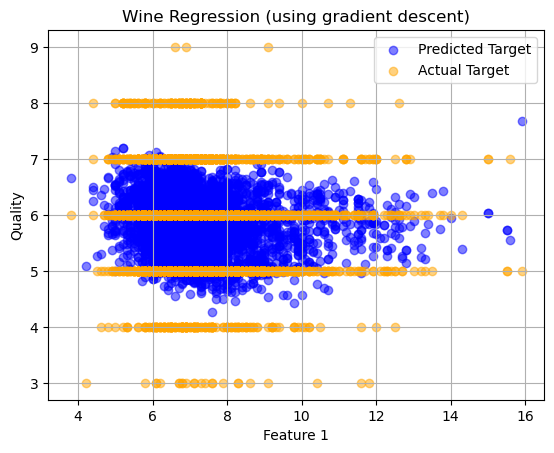

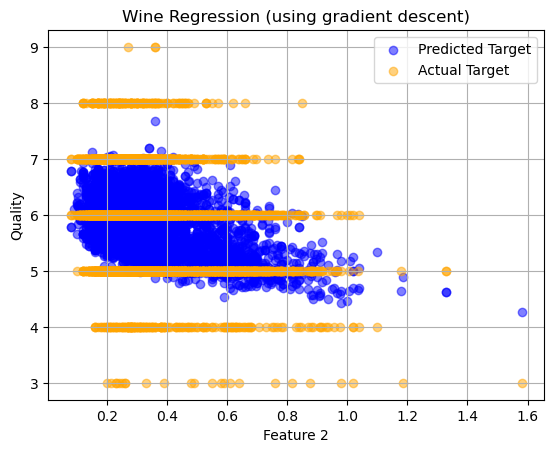

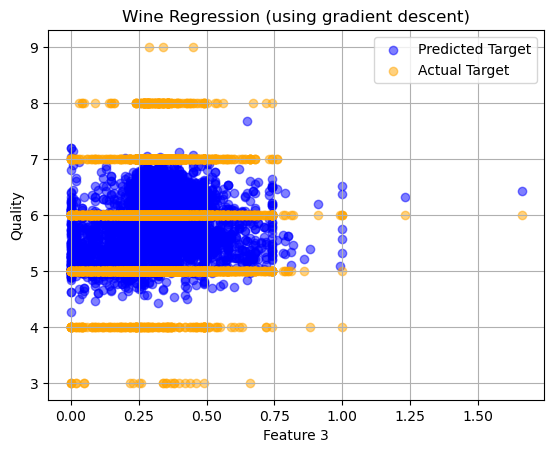

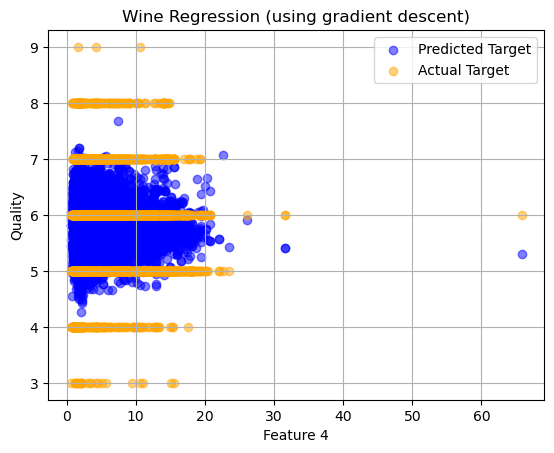

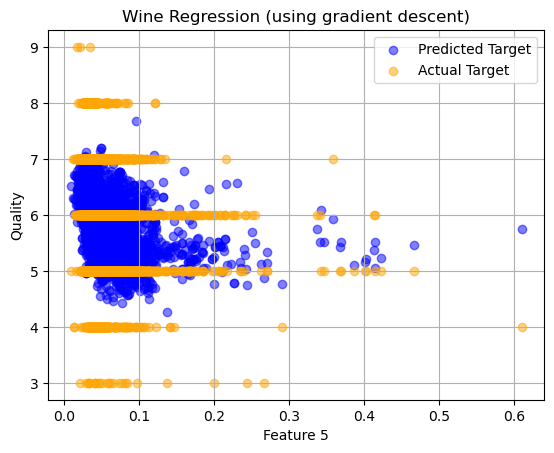

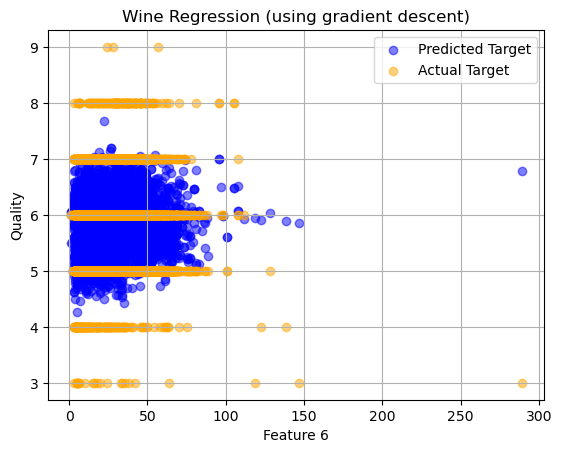

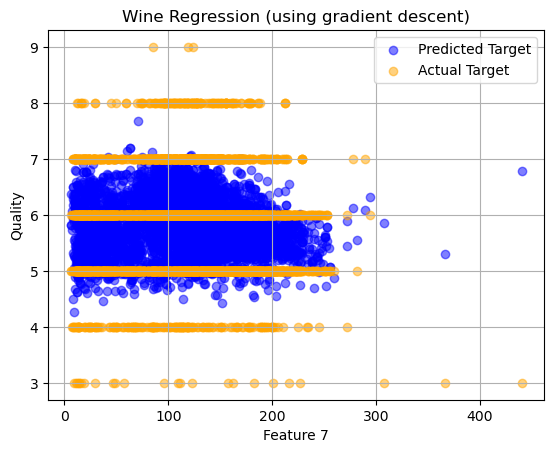

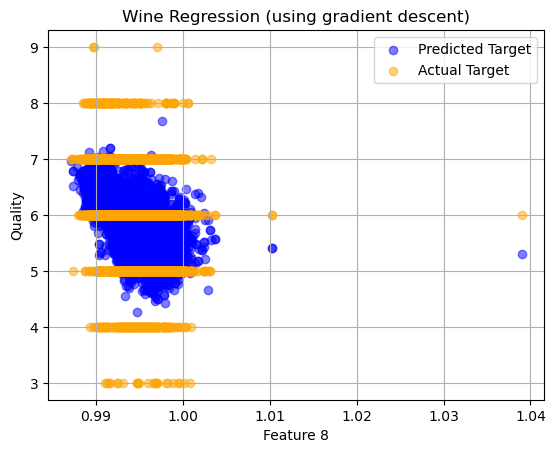

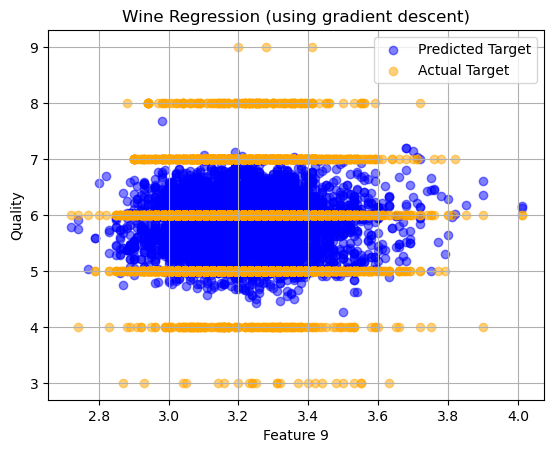

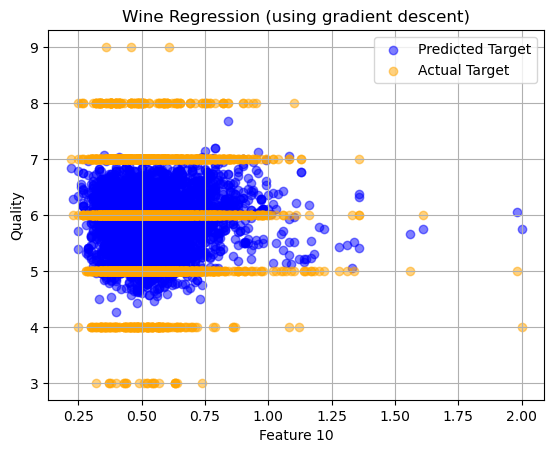

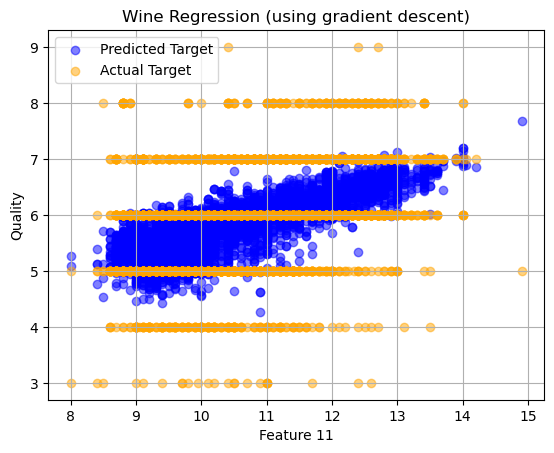

In [210]:
y_train_GD=predict(X_train,w_GD)
y_test_GD=predict(X_test,w_GD)
for i in range(np.shape(X_train)[1]):
    plt.scatter(X_train[:,i], y_train_pred, color='blue', label='Predicted Target', alpha=0.5)
    plt.scatter(X_train[:,i], y_train, color='orange', label='Actual Target', alpha=0.5)
    plt.title('Wine Regression (using gradient descent)')
    plt.xlabel(f"Feature {i+1}")
    plt.ylabel('Quality')
    plt.legend()
    plt.grid()
    plt.show()

In [243]:
rms_train_GD=rms(w_GD,X_train,y_train)
print(f"RMS error for training set from gradient descent: {rms_train_GD}")

rms_test_GD=rms(w_GD,X_test,y_test)
print(f"RMS error for test set from gradient descent: {rms_test_GD}")

RMS error for training set from gradient descent: 0.011155960934159067
RMS error for test set from gradient descent: 0.01841554252143068
